# **Ejercicios de Árboles Filogenéticos**

### *Autores: Gisela Belmonte y Diego Marrero*

---

Repositorio en GitHub: [https://github.com/giselabcruz/phylogenetic-trees-exercises](https://github.com/giselabcruz/phylogenetic-trees-exercises)


---

### EJERCICIO 1

**Enunciado**: Lee un árbol filogenético en formato newick con N especies y
obtén información sobre sus nodos, ramas y clados. Por ejemplo, el número
de nodos, el número de terminales, el nombre de cada terminal, la longitud de
cada rama, el clado más común, etc.


Entre los requisitos, se destaca que el árbol tenga 10 clados.

> Nosotros lo cumplimos correctamente, ya que estamos tratando un árbol extaído de la rama Fungi.

# La rama **Fungi**

In [17]:
from IPython.display import Image, display

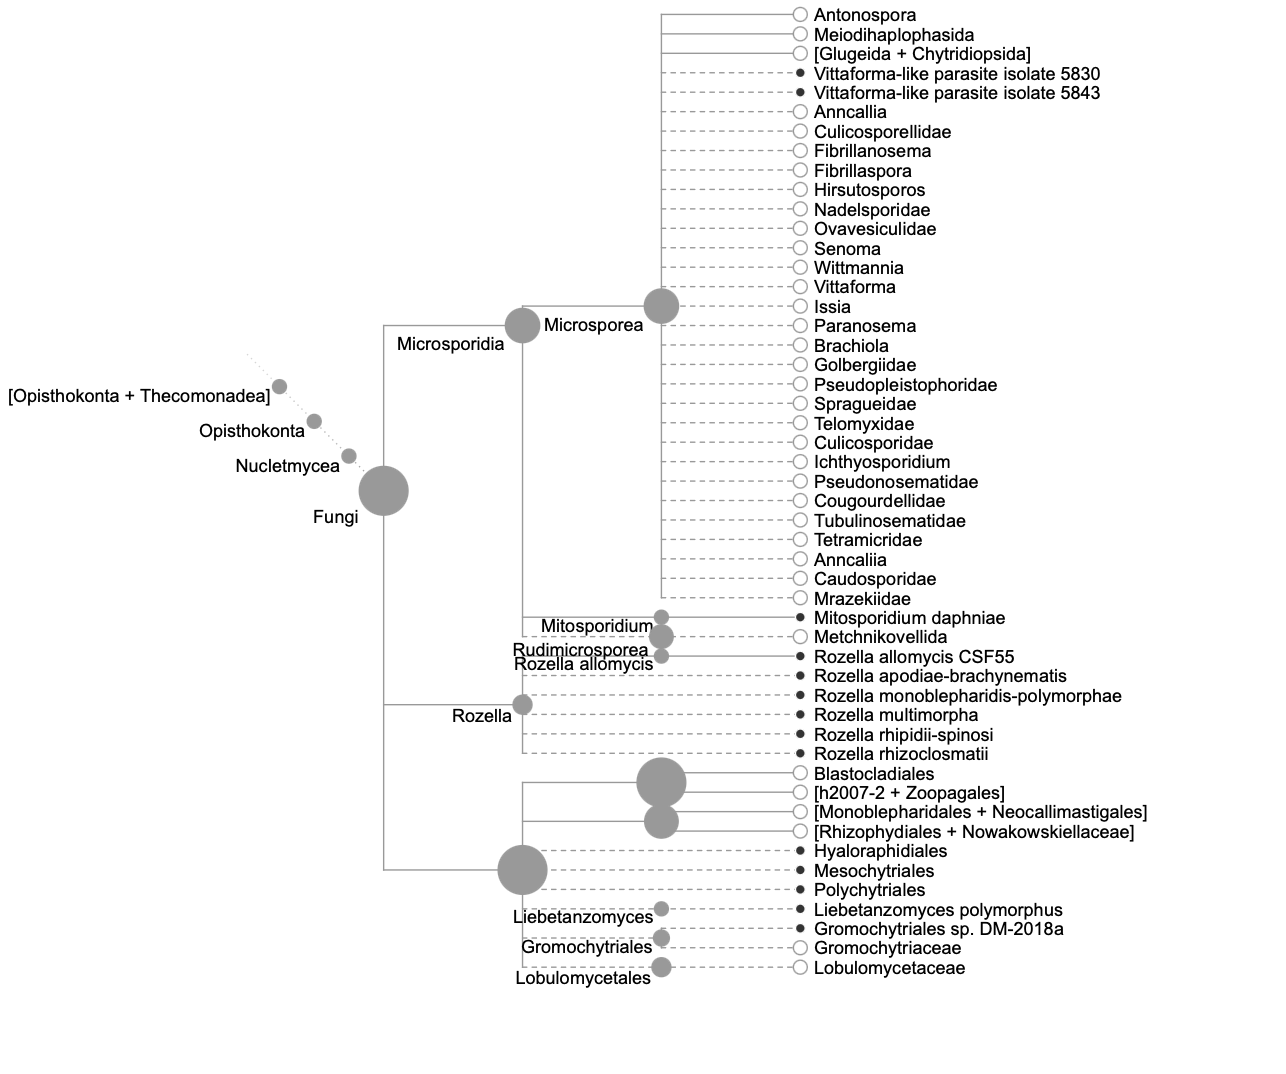

In [18]:
display(Image(filename="images/fungi.png"))

> El árbol lo hemos obtenido de la base de datos https://tree.opentreeoflife.org/opentree/argus/ottol@352914/Fungi. 

En concreto, debido a la extensión del árbol, nos centramos en:

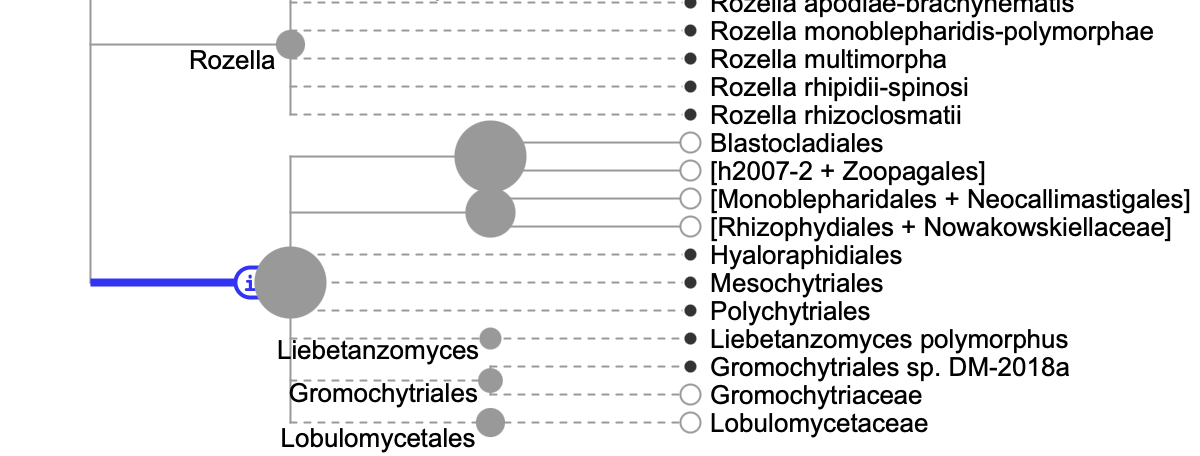

In [19]:
display(Image(filename="images/fungi_extracted.png"))

In [20]:
from Bio import Phylo

In [21]:
tree = Phylo.read("fungi.dnd", "newick")
print(tree)

Tree(rooted=False, weight=1.0)
    Clade(branch_length=0.0, name='Fungi')
        Clade(branch_length=0.3, name='Rozella')
            Clade(branch_length=0.2, name='Rozella_allomycis_CSF55')
            Clade(branch_length=0.2, name='Rozella_apodiae_brachynematis')
            Clade(branch_length=0.2, name='Rozella_monoblepharidis_polymorphae')
            Clade(branch_length=0.2, name='Rozella_multimorpha')
            Clade(branch_length=0.2, name='Rozella_rhipidii_spinosi')
            Clade(branch_length=0.2, name='Rozella_rhizoclosmatii')
        Clade(branch_length=0.3, name='Other_fungi')
            Clade(branch_length=0.2, name='Blastocladiales')
            Clade(branch_length=0.2, name='Zoopagales')
            Clade(branch_length=0.2, name='Monoblepharidales')
            Clade(branch_length=0.2, name='Rhizophydiales')


In [22]:
Phylo.draw_ascii(tree)

                          _______________ Rozella_allomycis_CSF55
                         |
                         |_______________ Rozella_apodiae_brachynematis
                         |
                         |_______________ Rozella_monoblepharidis_polymorphae
  _______________________|
 |                       |_______________ Rozella_multimorpha
 |                       |
 |                       |_______________ Rozella_rhipidii_spinosi
 |                       |
_|                       |_______________ Rozella_rhizoclosmatii
 |
 |                        _______________ Blastocladiales
 |                       |
 |                       |_______________ Zoopagales
 |_______________________|
                         |_______________ Monoblepharidales
                         |
                         |_______________ Rhizophydiales



### **INFORMACIÓN DEL ÁRBOL**

Número total de nodos (clados, internos + terminales)

In [23]:
all_clades = list(tree.find_clades())
num_nodos = len(all_clades)
print(f"Número total de nodos (clados): {num_nodos}")

Número total de nodos (clados): 13


Terminales (hojas / especies)

In [24]:
terminales = tree.get_terminals()
num_terminales = len(terminales)
print(f"Número de terminales (especies): {num_terminales}")

print("\nNombres de las terminales:")
for t in terminales:
    print(" -", t.name)

Número de terminales (especies): 10

Nombres de las terminales:
 - Rozella_allomycis_CSF55
 - Rozella_apodiae_brachynematis
 - Rozella_monoblepharidis_polymorphae
 - Rozella_multimorpha
 - Rozella_rhipidii_spinosi
 - Rozella_rhizoclosmatii
 - Blastocladiales
 - Zoopagales
 - Monoblepharidales
 - Rhizophydiales


Longitud de cada rama

In [25]:
print("\nLongitud de las ramas (si el Newick incluye longitudes):")
for clade in all_clades:
    if clade.branch_length is not None:
        nombre = clade.name if clade.name is not None else "[nodo interno]"
        print(f" - Rama hacia {nombre}: {clade.branch_length}")


Longitud de las ramas (si el Newick incluye longitudes):
 - Rama hacia Fungi: 0.0
 - Rama hacia Rozella: 0.3
 - Rama hacia Rozella_allomycis_CSF55: 0.2
 - Rama hacia Rozella_apodiae_brachynematis: 0.2
 - Rama hacia Rozella_monoblepharidis_polymorphae: 0.2
 - Rama hacia Rozella_multimorpha: 0.2
 - Rama hacia Rozella_rhipidii_spinosi: 0.2
 - Rama hacia Rozella_rhizoclosmatii: 0.2
 - Rama hacia Other_fungi: 0.3
 - Rama hacia Blastocladiales: 0.2
 - Rama hacia Zoopagales: 0.2
 - Rama hacia Monoblepharidales: 0.2
 - Rama hacia Rhizophydiales: 0.2


Clado más común

In [26]:
max_clade = None
max_size = 0

for clade in all_clades:
    hojas_clado = clade.get_terminals()
    size = len(hojas_clado)
    if size > max_size:
        max_size = size
        max_clade = clade

print("\nClado con mayor número de terminales:")
nombre_clado = max_clade.name if max_clade.name is not None else "[nodo interno sin nombre]"
print(f" - Nombre del clado: {nombre_clado}")
print(f" - Número de terminales en ese clado: {max_size}")
print(" - Especies en ese clado:")
for t in max_clade.get_terminals():
    print("   ·", t.name)


Clado con mayor número de terminales:
 - Nombre del clado: Fungi
 - Número de terminales en ese clado: 10
 - Especies en ese clado:
   · Rozella_allomycis_CSF55
   · Rozella_apodiae_brachynematis
   · Rozella_monoblepharidis_polymorphae
   · Rozella_multimorpha
   · Rozella_rhipidii_spinosi
   · Rozella_rhizoclosmatii
   · Blastocladiales
   · Zoopagales
   · Monoblepharidales
   · Rhizophydiales


### EJERCICIO 2


**Enunciado**: Modifica el árbol filogenético previo cambiando el nombre, la
longitud o el color de algunos nodos o ramas. Por ejemplo, cambia el nombre
de las especies, la longitud de la rama que conecta alguna especie por 0.5 y el
color de la rama que conecta alguna otra especie por rojo.

In [27]:
import matplotlib.pyplot as plt

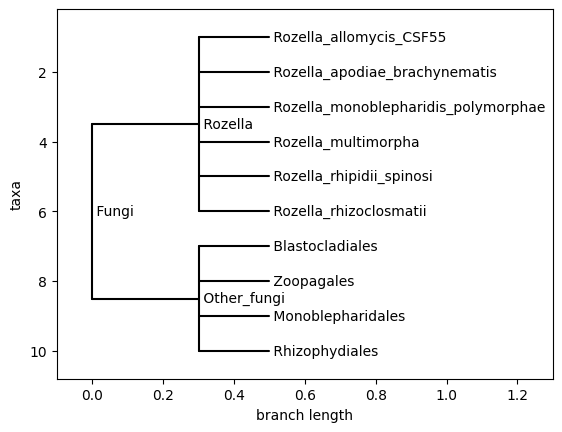

In [28]:
# Cargamos el árbol simple.dnd en formato Newick
tree = Phylo.read("fungi.dnd", "newick")

# Dibujamos el árbol original
Phylo.draw(tree, xlim=(-0.1, 1.3))


Como indica el ejercicio, modificamos el nombre, longitud de rama y color del árbol

=== TERMINALES ORIGINALES ===
- Rozella_allomycis_CSF55  (branch_length=0.2)
- Rozella_apodiae_brachynematis  (branch_length=0.2)
- Rozella_monoblepharidis_polymorphae  (branch_length=0.2)
- Rozella_multimorpha  (branch_length=0.2)
- Rozella_rhipidii_spinosi  (branch_length=0.2)
- Rozella_rhizoclosmatii  (branch_length=0.2)
- Blastocladiales  (branch_length=0.2)
- Zoopagales  (branch_length=0.2)
- Monoblepharidales  (branch_length=0.2)
- Rhizophydiales  (branch_length=0.2)

[OK] Nombre cambiado para Rozella_allomycis_CSF55 -> Rozella_allomycis_renamed
[OK] Longitud de rama de Zoopagales ajustada a 0.5
[OK] Rama de Rhizophydiales coloreada en rojo

=== TERMINALES MODIFICADOS ===
- Rozella_allomycis_renamed  (branch_length=0.2, color=None)
- Rozella_apodiae_brachynematis  (branch_length=0.2, color=None)
- Rozella_monoblepharidis_polymorphae  (branch_length=0.2, color=None)
- Rozella_multimorpha  (branch_length=0.2, color=None)
- Rozella_rhipidii_spinosi  (branch_length=0.2, color=None)
-

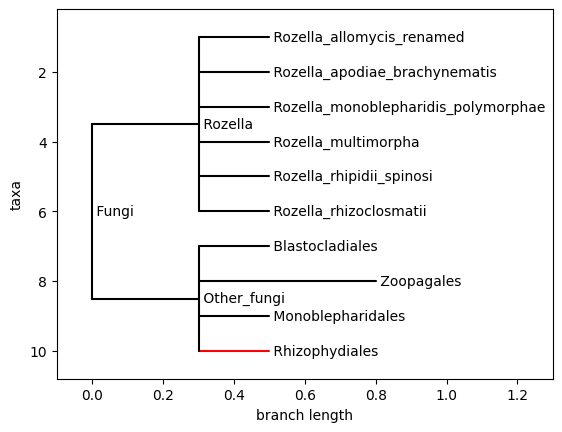

In [29]:

# 1. Cargamos el mismo árbol que en el ejercicio 1
tree = Phylo.read("fungi.dnd", "newick")

print("=== TERMINALES ORIGINALES ===")
for term in tree.get_terminals():
    print(f"- {term.name}  (branch_length={term.branch_length})")
# Así podemos ver las ramas originales para nombrarlas en los cambios


# CAMBIOS PEDIDOS EN EL EJ. 2

# (a) Cambiar el nombre de una especie
#    Ejemplo: renombrar 'Rozella_allomycis_CSF55'
for clade in tree.get_terminals():
    if clade.name == "Rozella_allomycis_CSF55":
        clade.name = "Rozella_allomycis_renamed"
        print("\n[OK] Nombre cambiado para Rozella_allomycis_CSF55 -> Rozella_allomycis_renamed")
        break

# (b) Poner la longitud de la rama de otra especie a 0.5
#    Ejemplo: 'Zoopagales'
for clade in tree.find_clades():
    if clade.name == "Zoopagales":
        clade.branch_length = 0.5
        print("[OK] Longitud de rama de Zoopagales ajustada a 0.5")
        break

# (c) Colorear de rojo la rama que lleva a otra especie
#    Ejemplo: 'Rhizophydiales'
for clade in tree.find_clades():
    if clade.name == "Rhizophydiales":
        clade.color = "red"   # Biopython usa clade.color al dibujar el árbol :contentReference[oaicite:1]{index=1}
        print("[OK] Rama de Rhizophydiales coloreada en rojo")
        break

print("\n=== TERMINALES MODIFICADOS ===")
for term in tree.get_terminals():
    print(f"- {term.name}  (branch_length={term.branch_length}, color={getattr(term, 'color', None)})")

# Dibujamos el árbol modificado con el mismo rango en X que antes
Phylo.draw(tree, xlim=(-0.1, 1.3))


### Conclusiones y apreciaciones

En este ejercicio se modificaron manualmente distintos atributos del árbol filogenético cargado desde `fungi.dnd` con el fin de entender cómo manipular su estructura y su representación gráfica. Primero se renombró una de las especies terminales (_Rozella_allomycis_) para reflejar cómo pueden actualizarse etiquetas dentro del árbol. Después, se ajustó la longitud de rama de *Zoopagales* a un valor fijo (**0.5**), mostrando que es posible alterar directamente las distancias evolutivas representadas por si quisiéramos ajustarlas. Por último, se coloreó en rojo la rama correspondiente a _Rhizophydiales_, evidenciando que Biopython nos permite resaltar visualmente nodos o clados específicos. Estos cambios se reflejaron de forma inmediata en el árbol dibujado, proporcionando una visualización más informativa y demostrando la flexibilidad del formato Newick y de la biblioteca Phylo para editar y personalizar árboles filogenéticos.

### **EJERCICIO 3**

### 3.1 Resuelva la construcción del árbol Filogenético con el método UPGMA a mano:


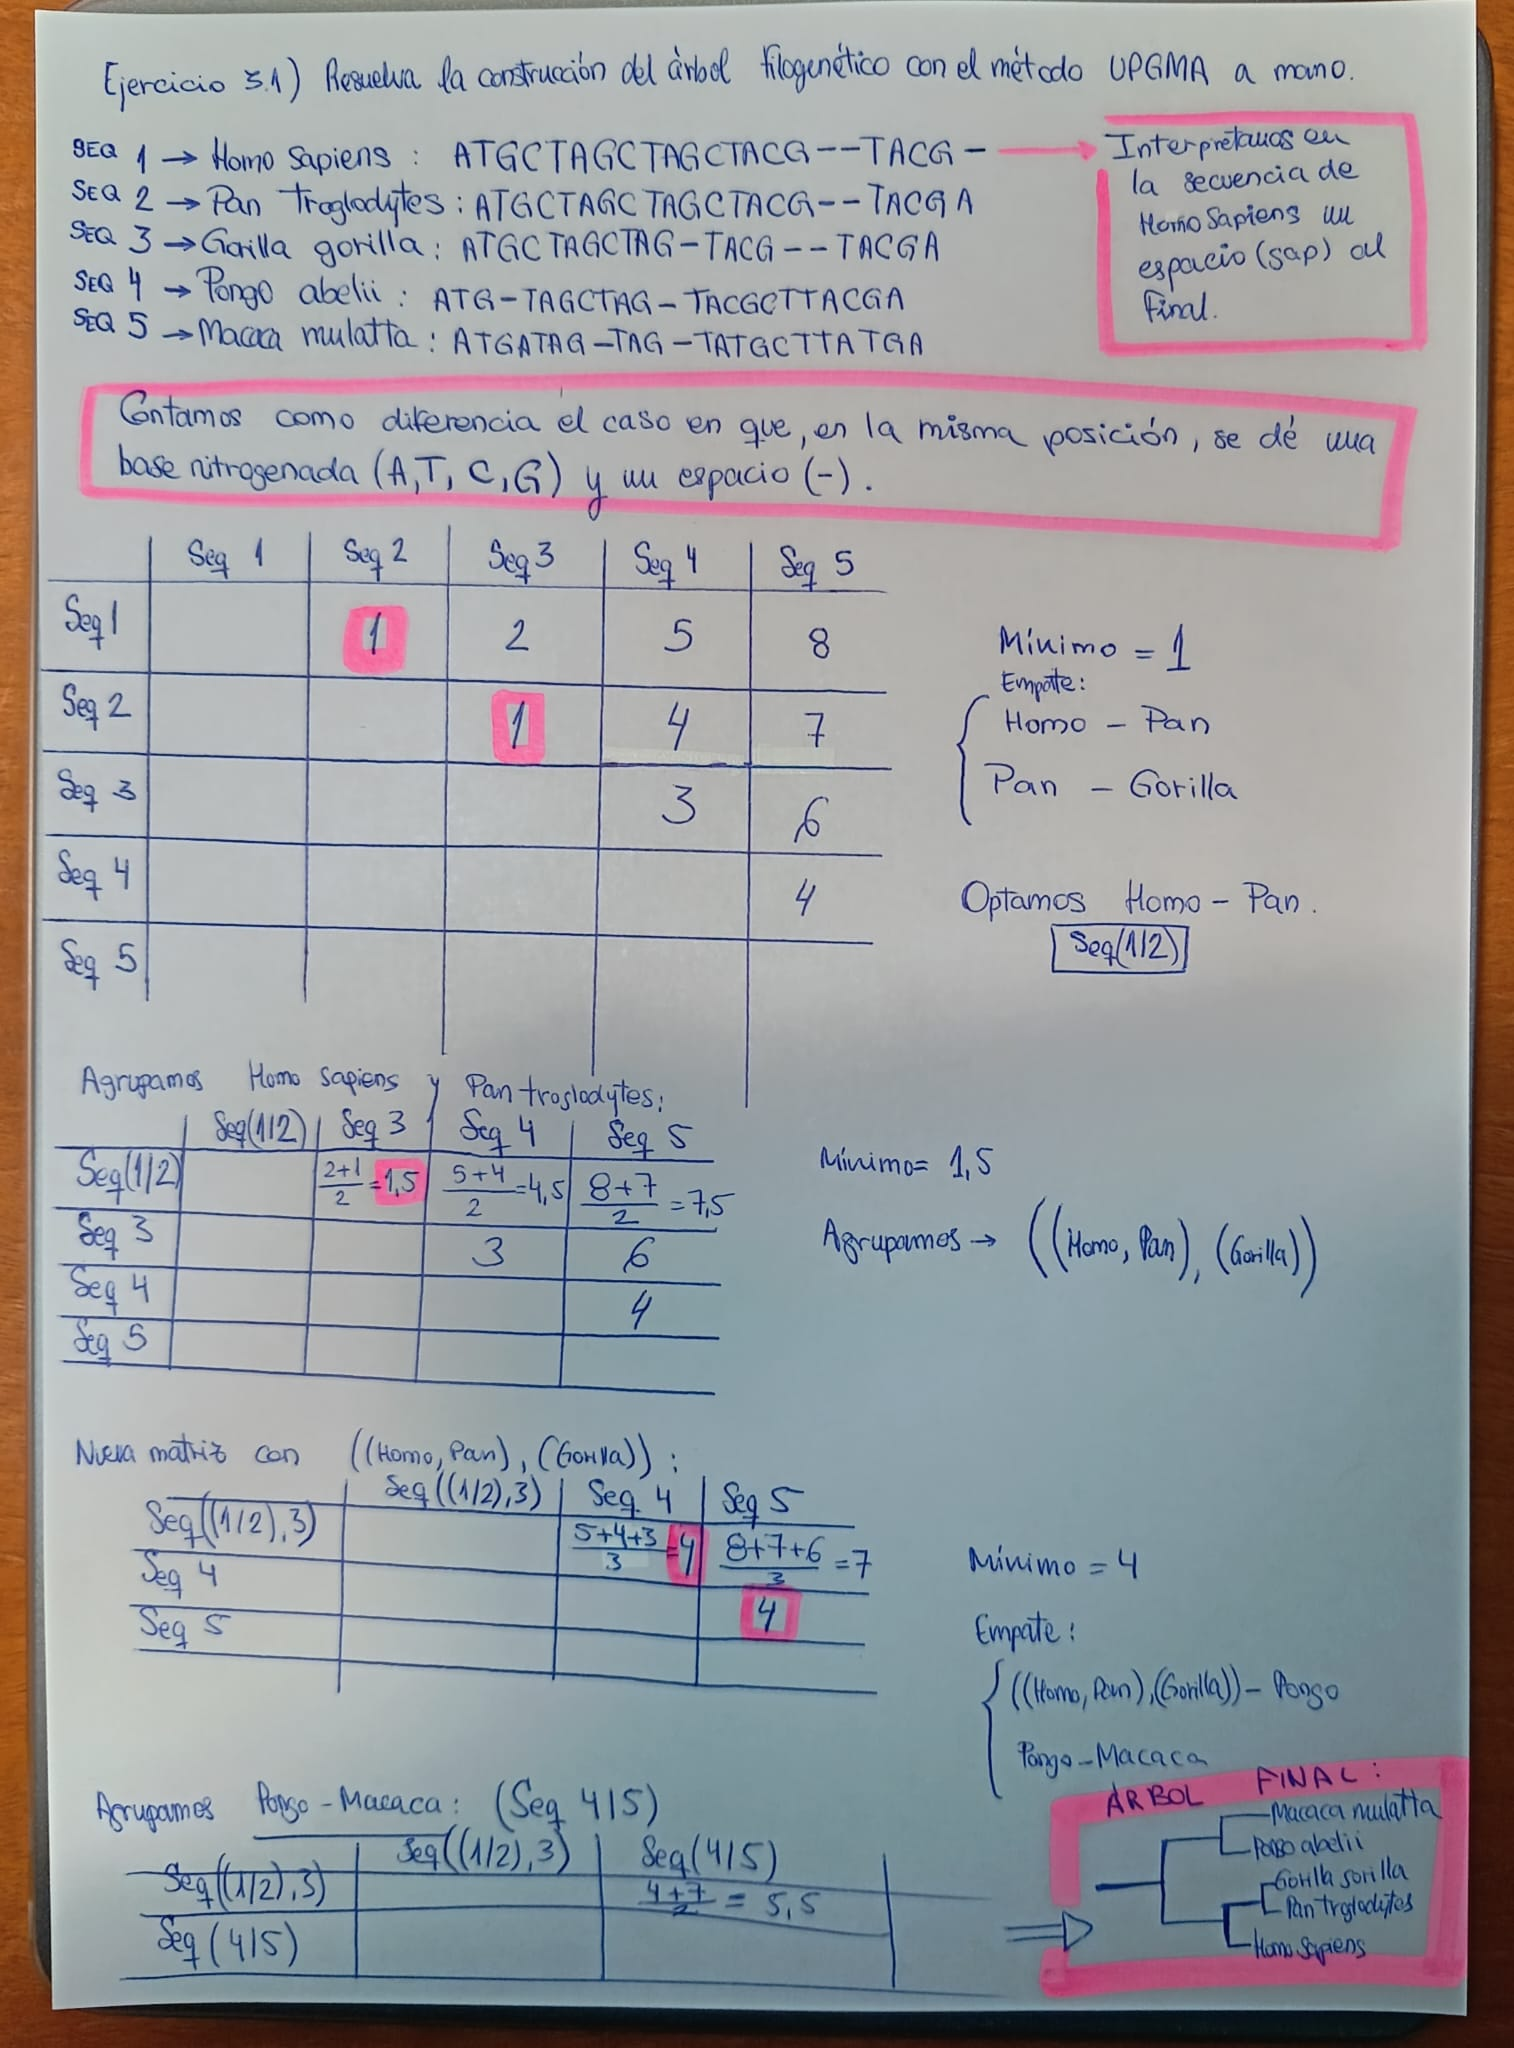

In [30]:
display(Image(filename="exercise3/ejercicio_3.png"))

### 3.2 Cargamos el FASTA y generamos los árboles con las metodologías indicadas

#### 3.2.1 Cargar el FASTA

In [31]:
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

# Cargar alineamiento FASTA
alignment = AlignIO.read("sequences.fasta", "fasta")

print(alignment)
print("Número de secuencias:", len(alignment))
print("Longitud alineamiento:", alignment.get_alignment_length())


Alignment with 5 rows and 23 columns
ATGCTAGCTAGCTACG--TACG- Homo_sapiens
ATGCTAGCTAGCTACG--TACGA Pan_troglodytes
ATGCTAGCTAG-TACG--TACGA Gorilla_gorilla
ATG-TAGCTAG-TACGCTTACGA Pongo_abelii
ATGATAG-TAG-TATGCTTATGA Macaca_mulatta
Número de secuencias: 5
Longitud alineamiento: 23


#### 3.2.2 Árbol por método de distancia (UPGMA)

In [32]:
# Calculamos matriz de distancias (identidad)
calculator = DistanceCalculator("identity")
dm = calculator.get_distance(alignment)

print(dm)


Homo_sapiens    0.000000
Pan_troglodytes 0.043478    0.000000
Gorilla_gorilla 0.086957    0.043478    0.000000
Pongo_abelii    0.217391    0.173913    0.130435    0.000000
Macaca_mulatta  0.347826    0.304348    0.260870    0.173913    0.000000
    Homo_sapiens    Pan_troglodytes Gorilla_gorilla Pongo_abelii    Macaca_mulatta


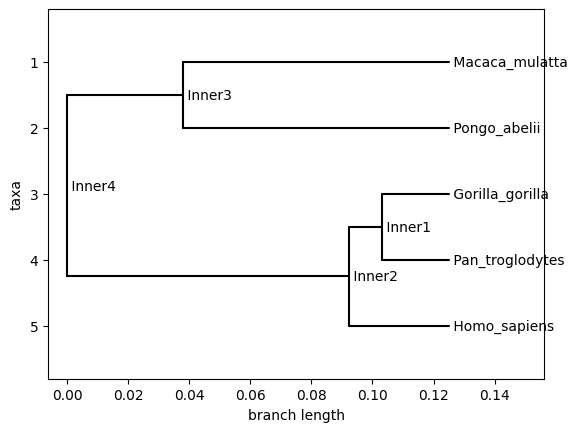

In [33]:
# Construimos árbol UPGMA
constructor = DistanceTreeConstructor()
upgma_tree = constructor.upgma(dm)

# Y lo dibujamos
Phylo.draw(upgma_tree)

#### 3.2.3 Árbol por Máxima Parsimonia

In [34]:
from Bio.Phylo.TreeConstruction import ParsimonyScorer, NNITreeSearcher, ParsimonyTreeConstructor

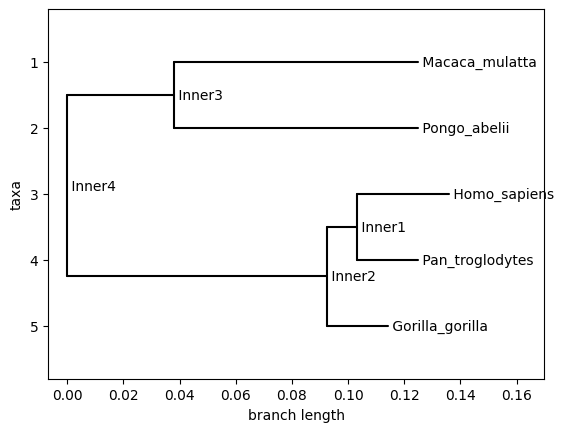

In [35]:
# Scorer de parsimonia
scorer = ParsimonyScorer()

# Búsqueda por intercambios NNI
searcher = NNITreeSearcher(scorer)

# Constructor de parsimonia
constructor_pars = ParsimonyTreeConstructor(searcher)

pars_tree = constructor_pars.build_tree(alignment)

Phylo.draw(pars_tree)


### 3.3 Guardar árboles en formato Newick y graficar

In [36]:
# Guardar árboles
Phylo.write(upgma_tree, "tree_upgma.newick", "newick")
Phylo.write(pars_tree, "tree_parsimony.newick", "newick")

print("Árboles guardados en formato Newick")


Árboles guardados en formato Newick


In [37]:
print(upgma_tree.format("newick"))
print(pars_tree.format("newick"))

((Macaca_mulatta:0.08696,Pongo_abelii:0.08696)Inner3:0.03804,((Gorilla_gorilla:0.02174,Pan_troglodytes:0.02174)Inner1:0.01087,Homo_sapiens:0.03261)Inner2:0.09239)Inner4:0.00000;

((Macaca_mulatta:0.08696,Pongo_abelii:0.08696)Inner3:0.03804,((Homo_sapiens:0.03261,Pan_troglodytes:0.02174)Inner1:0.01087,Gorilla_gorilla:0.02174)Inner2:0.09239)Inner4:0.00000;



### 3.4 Comparación de resultados y análisis


El árbol obtenido mediante el método UPGMA en Biopython es coherente con la resolución manual realizada en papel. La matriz de distancias muestra un __empate__ en la distancia mínima entre los pares *Homo sapiens – Pan troglodytes* y *Pan troglodytes – Gorilla gorilla*, lo que implica que el primer agrupamiento puede variar en función del criterio de desempate aplicado. En la resolución manual se optó por agrupar primero *Homo sapiens* y *Pan troglodytes*, mientras que el algoritmo computacional puede seleccionar cualquiera de los pares con distancia mínima. Esta diferencia explica la aparición de dos topologías muy similares, que solo difieren en el orden de unión dentro del clado formado por *Homo*, *Pan* y *Gorilla*. En ambos casos, el resto del árbol coincide plenamente, agrupando conjuntamente a *Pongo abelii* y *Macaca mulatta* como el clado **más divergente**. Por tanto, los resultados computacionales validan la correcta aplicación del método UPGMA realizada manualmente, siendo las diferencias observadas consecuencia únicamente del empate inicial en las distancias.
